Final Project Check-in 2018-11-14
------

Group Name
-----

Student Names
----

1. Rebecca Reilly
2. Viviana Marquez
3. Victoria Suarez
4. Fiorella Tenorio
5. Katja Wittfoth 

Load Data
-----

In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/Users/rreilly/MSDS/msds621/MSDS621_Project/lyrics.csv')

In [13]:
df = df[(df.genre == 'Country') | (df.genre == 'Metal') | (df.genre == 'Hip-Hop') | (df.genre == 'Jazz')
       | (df.genre == 'Electronic') ]
df = df[pd.notnull(df['lyrics'])]
df = df[df['genre']!= 'Not Available']
df = df[df['genre']!= 'Other']

In [14]:
df = df.replace({'\n': ' '}, regex=True)

Fit scikit-learn model
----

In [15]:
train, test = train_test_split(df, test_size=0.2)
train_lyrics = df['lyrics']
train_genre = df['genre']

In [16]:
pipeline = Pipeline([('vect', CountVectorizer(stop_words='english', 
                                              lowercase=True, 
                                              analyzer = 'word', 
                                              )),
                     ('clf', MultinomialNB(alpha=.1))]) 

In [17]:
pipeline.fit(train_lyrics, train_genre)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [18]:
pred = pipeline.predict(test['genre'])

Evaluation Metric
----

In [19]:
con_mat = confusion_matrix(test['genre'], pred)

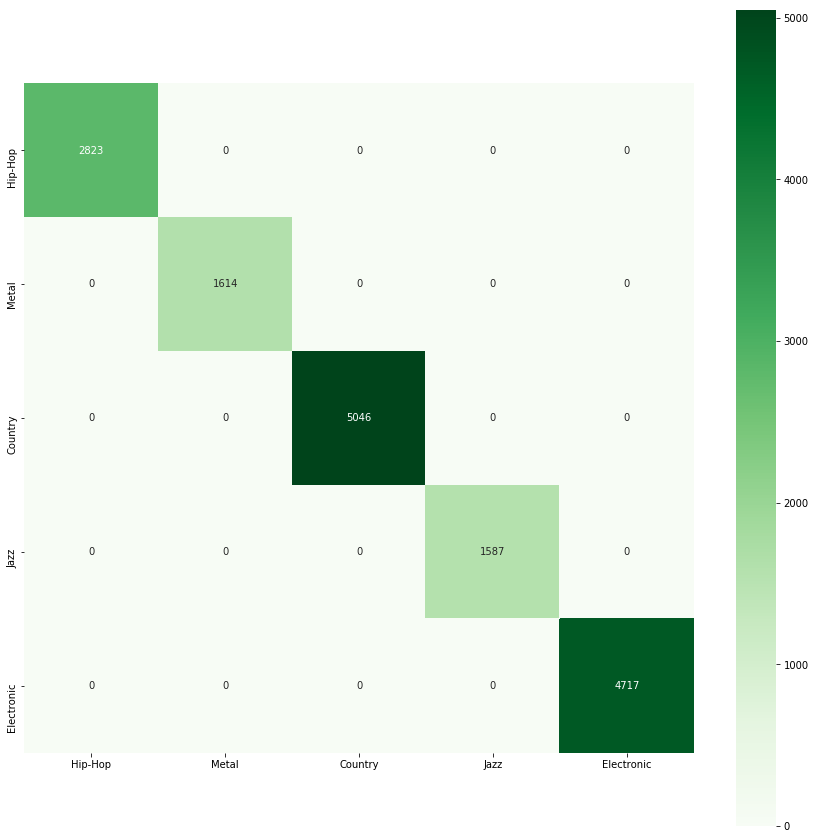

In [20]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(con_mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=df.genre.unique(), yticklabels=df.genre.unique(), cmap="Greens")

In [21]:
accuracy_score(pred, test['genre']) 

1.0